In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

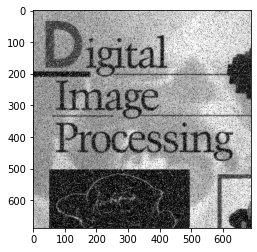

In [2]:
path='/content/drive/MyDrive/DIP/Assignment03'
img=plt.imread(path+'/input/noisy_book1.png')
plt.imshow(img,cmap='gray')

**Mean Filter**

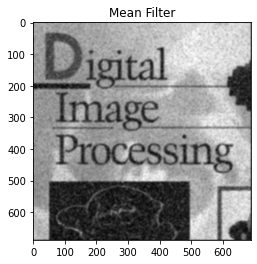

In [3]:
def mean_filter(img,k):
  filter=np.ones((k,k))
  img_ft=cv2.filter2D(img,-1,filter,borderType=cv2.BORDER_CONSTANT)/k**2

  return img_ft

def Q3A():
  denoise_img=mean_filter(img,7)
  plt.title('Mean Filter')
  plt.imshow(denoise_img,cmap='gray')
  plt.imsave(path+'/output/denoise_img_mean.png',denoise_img,cmap='gray')
Q3A()

**Median Filter**

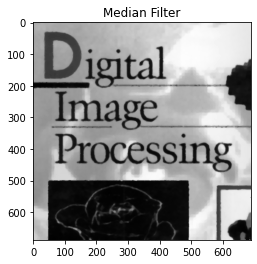

In [4]:
def meadian_filter(img,k):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if i+k<img.shape[0] and j+k<img.shape[1]:
        window=img[i:i+k,j:j+k]
        img[i][j]=np.median(np.sort(window.flatten()))
      elif j+k<img.shape[1]:
        window=img[i:img.shape[0],j:j+k]
        img[i][j]=np.median(np.sort(window.flatten()))
      elif i+k<img.shape[0]:
        window=img[i:i+k,j:img.shape[1]]
        img[i][j]=np.median(np.sort(window.flatten()))
  return img

def Q3B():
  denoise_img=meadian_filter(img,7)
  plt.title('Median Filter')
  plt.imshow(denoise_img,cmap='gray')
  plt.imsave(path+'/output/denoise_img_meadian.png',denoise_img,cmap='gray')
Q3B()

**Gaussian Smoothing**

In [5]:
img=plt.imread(path+'/input/noisy_book2.png')
def gaus_smooth(img,sigma):
  filter=np.asarray(img)
  x,y=np.ogrid[:5,:5]
  filter=np.exp(-(x**2+y**2)/(2*sigma**2))/(2*np.pi*sigma**2)
  smooth_img=cv2.filter2D(img,-1,filter,borderType=cv2.BORDER_CONSTANT)
  #smooth_img=img*(filter*255)
  return smooth_img,filter

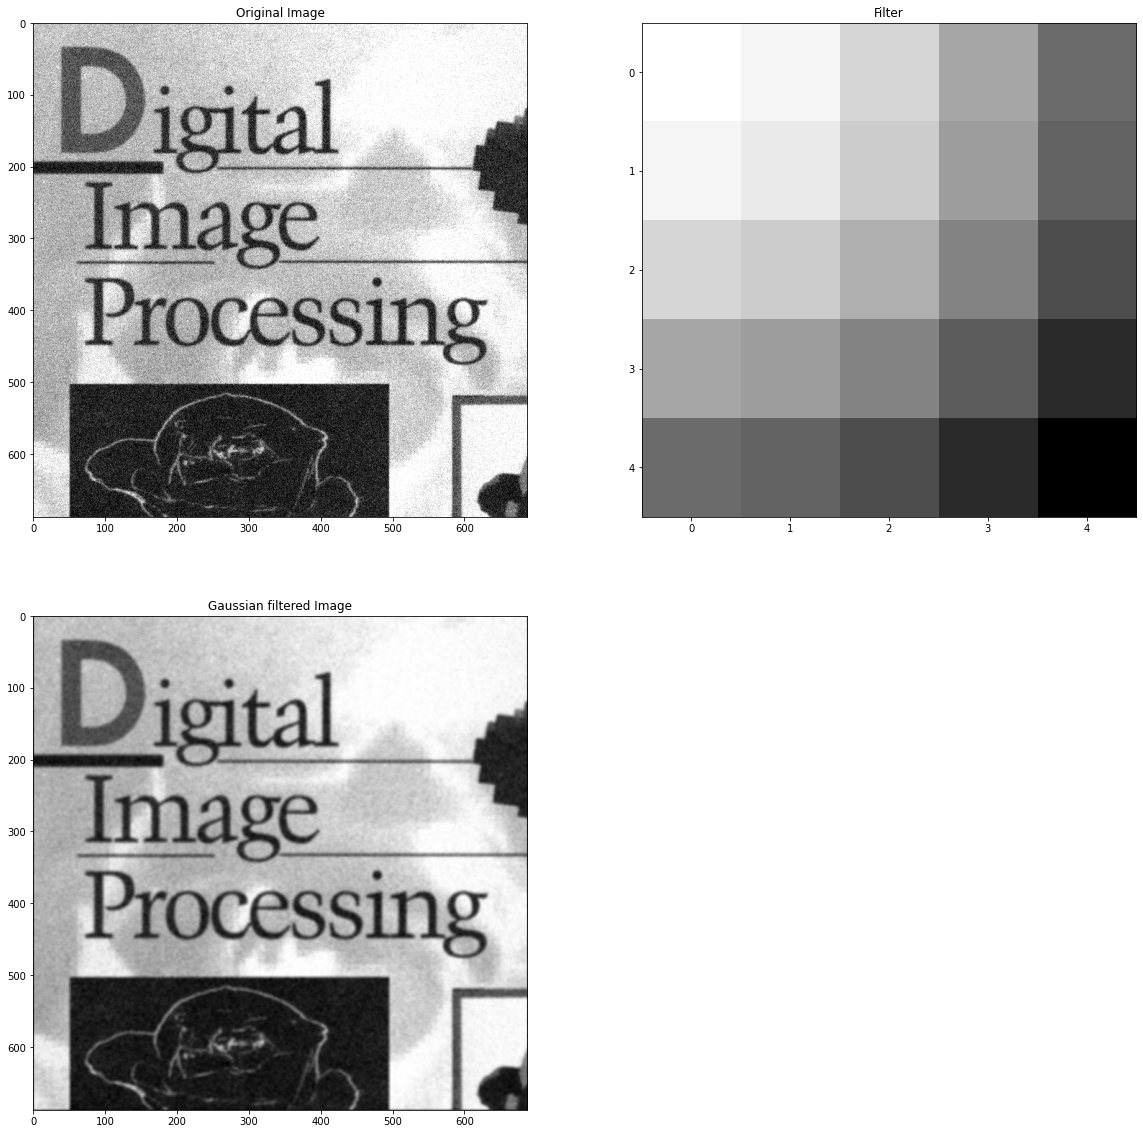

In [6]:
def Q3C():
  smooth_img,filter=gaus_smooth(img,5)
  plt.figure(figsize=(20,20))
  plt.subplot(2,2,3)
  plt.title('Gaussian filtered Image')
  plt.imshow(smooth_img, cmap='gray')
  plt.subplot(2,2,1)
  plt.title('Original Image')
  plt.imshow(img, cmap='gray')
  plt.subplot(2,2,2)
  plt.title('Filter')
  plt.imshow(filter, cmap='gray')
Q3C()

**Bilateral** **filter**

In [7]:
I=plt.imread(path+'/input/noisy_book2.png')
data=I
radius=7
I=np.lib.pad(I, 1, 'mean')
I_new=np.copy(data)


def distance(i, j):
    return np.absolute(i-j)


In [8]:
def bilateral_filter(i,j,d,I,sigma_d,sigma_r):
    arr=[]
    sum_num=0
    sum_den=0
    for k in range(i-math.floor(d/2),i+math.ceil(d/2)):
        for l in range(j-math.floor(d/2),j+math.ceil(d/2)):
            term1=(((i-k)**2)+(j-l)**2)/(sigma_d**2*2)
            term2=(distance(I[i,j],I[k,l]))/(sigma_r**2*2)
            term=term1+term2
            w=math.exp(-term)
            arr.append(w)
            sum_num=sum_num+(I[k,l]*w)
            sum_den=sum_den+w      
    return sum_num/sum_den


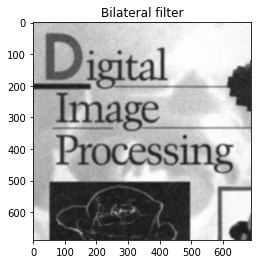

In [10]:
def Q3D():
  for i in range(1,data.shape[0]):
      for j in range(1,data.shape[1]):
          I_new[i-1,j-1]=bilateral_filter(i-1,j-1,radius,I,5,5)

  plt.imsave(path+'/output/bilateral_filter_denoise.png',I_new,cmap='gray')
  plt.title('Bilateral filter')
  plt.imshow(I_new,cmap='gray')
Q3D()